Links zu Dokumentationen/Tutorials für IPython/Python/numpy/matplotlib/git sowie die Sourcodes findet ihr im [GitHub Repo](https://github.com/BerndSchwarzenbacher/numdiff).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

###Modellierung mit Newtonschem Gesetz:
Die tangentiale Kraft $F_{tan}(t) = m \; g \; sin(\alpha(t))$ wirkt entgegen der Rückstellkraft des Pendels:
$F_{R}(t) = -F_{tan}(t) = m \; \ddot \alpha(t) \; l$.

Insgesamt ergibt sich als DGL 2. Ordnung:
$- m \; g \; sin(\alpha(t)) = m \; \ddot \alpha(t) \; l$.

Umgeformt auf ein DGL-System 1. Ordnung:

$\begin{eqnarray}
  \dot \alpha(t) &=& x(t) \\
  \dot x(t)      &=& - \frac{g}{l} sin(\alpha(t))
\end{eqnarray}$

###Modellierung mit Hamilonschem Prinzip:
Gegeben ist die Energiefunktion: $H(p,q) = -m g l \; cos(q) + \frac{1}{2 m l^{2}} p^{2}$.

Mit den Hamiltonschen Bewegungsgleichungen ergibt sich:

$\begin{eqnarray}
  \dot q &=& \frac{\partial H}{\partial p} &=& p \frac{1}{m l^{2}} \\
  \dot p &=& \frac{\partial H}{\partial q} &=& -m g l \; sin(q)
\end{eqnarray}$

#Berechnung
###Optionen:

In [2]:
step = 10**(-4)
max_time = 10**4
mass = 1
grav = 1
length = 1

###Anfangswerte:

In [3]:
alpha0 = math.pi/4
alpha_dot_0 = 0

In [4]:
sol_length = max_time/step
time = np.arange(0, max_time, step)
solution = np.zeros((2, sol_length))
solution[0, 0] = alpha0
solution[1, 0] = alpha_dot_0

###Explizites Eulerverfahren - Iteration:

In [5]:
%time 
for i, s in enumerate(solution[:,:-1].transpose()): 
    solution[0,i+1] = s[0] + step * s[1]
    solution[1,i+1] = s[1] - step * grav/length * math.sin(s[0])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.81 µs


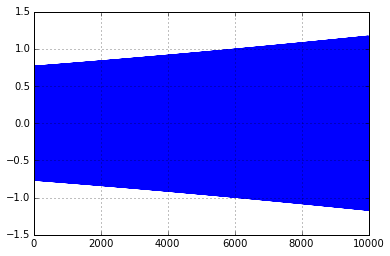

In [7]:
plt.plot(time, solution[1,:])
#plt.axis([-0.1, 1.1, -0.1, 1.1])
plt.grid()
plt.show()